In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
from auxiliarymethods import datasets as dp
from auxiliarymethods.reader import tud_to_networkx
import pandas as pd
from sklearn.decomposition import KernelPCA, TruncatedSVD
from matplotlib import pyplot as plt
from nrkmeans import NrKmeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
import seaborn as sns
from scipy.sparse import load_npz
import auxiliarymethods.auxiliary_methods as aux
import networkx as nx
from sklearn.cluster import KMeans
from copy import deepcopy

ModuleNotFoundError: No module named 'torch_geometric'

# Task 1 - Exploratory data analysis
## Group 8
#### Godun Alina, Börtlein Lorenz, Kodar Mark-Eerik, Car Franko
### Algorithm - P3C
### Dataset - ENZYMES

Our choice of dataset has been the enzymes dataset. Enzymes play critical role in living organisms.
Understanding enzymes, predicting their structure and functionality portrays an integral challenge in modern science.
An enzyme can be regarded in four different structural levels, which are all important to determine the certain functionality and application.
An enzyme consists of a certain amino acid sequence. This depicts the primary structure of an enzyme.
The secondary structure displays the spacial alignment of the protein, largely due to hydrogen bonds that exert a force of attraction onto the other enzymes.
Detecting these folds with a high accuracy is a well known problem in science and the solving of that problem took a huge step forward by a new AI guided approach of Google's DeepMind.
When having attained the knowledge of the amino acid sequence and the secondary structural properties that make up an enzyme, one can compare this information to a
wide range of different databases according to different properties of the enzyme. Thus, when finding a certain threshold of similarity according to a distinct feature
the functional properties of an enzyme can be inferred. Sadly, this technique is lacking a universal validity, as the comparison of structural properties merely may infer a
common ancestor, thus concluding same properties. So, Borgwardt et al. developed a graph guided approach using graph kernels and support vector machine classification to represent
several types of information defining different similarity measures of an enzyme according to different protein function prediction systems, thus making the evaluation more reliable.
To reduce the loss of information when applying SVM to a dataset with high dimensionality, they represent protein structures as graphs of their secondary structure elements, the folding of the enzyme.
Our goal is to cluster the given data according to the interval approach guided clustering algorithm P3C to gain insight into the different properties of our enzyme.
After clustering, we assert the found cluster cores with their assigned points to the according graph nodes of our trained model.
In the next step we will be able to perform graph-matching algorithms to measure structural similarity between the different enzymes to infer shared properties.
The goal is to conclude the correct enzyme commission number (EC), which is a numerical classification for enzyme-catalyzed reactions, of a given enzyme according to a probabilistic decision.

## Overview of NMI performance for different representations

### KPCA
Applied [Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) with the provided Gram matrix and then clustered the reduced representation with Subkmeans with $k=$'number of ground truth classes'.


### SVD
Applied [Truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) a version of SVD that can handle sparse feature matrices and then clustered the reduced representation with Subkmeans with $k=$'number of ground truth classes'.

### Spectral Clustering
Applied [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html), an algorithm that is often used to cluster graph data, with the similarities provided by the Gram matrices and with $k=$'number of ground truth classes'. In contrast to Subkmeans Spectral Clustering can find arbitrarily shaped clusters.

#################node_labels#################


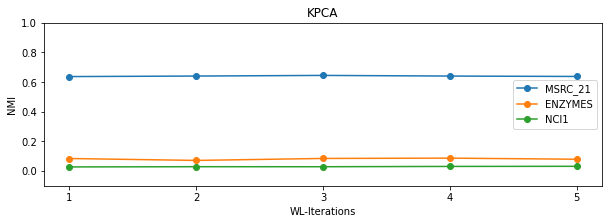

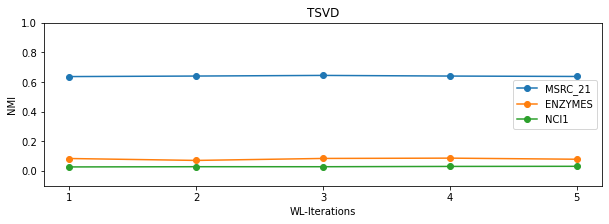

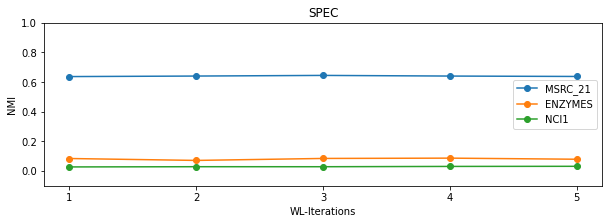

#################without_labels#################


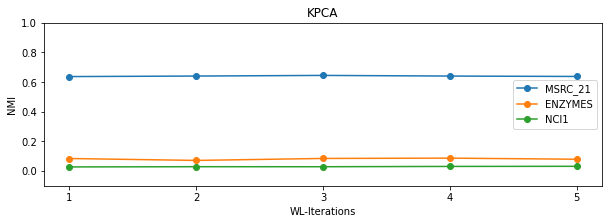

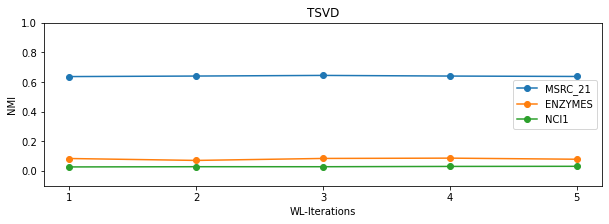

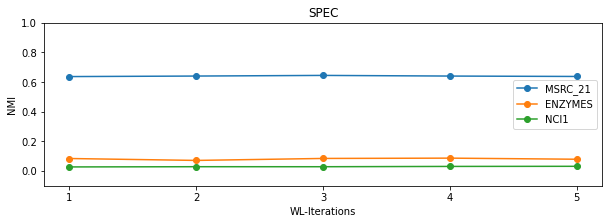

In [21]:
result_names = ["KPCA", "TSVD", "SPEC"]
for version in ["node_labels", "without_labels"]:
    print(f"#################{version}#################")
    for name_i in result_names:
        path_i = os.path.join('kernels', 'node_labels', 'KPCA.csv')
        nmi_df = pd.read_csv(path_i, index_col=0)
        fig, ax = plt.subplots(figsize=(10,3))
        ax.set_ylabel("NMI")
        ax.set_xlabel("WL-Iterations")
        ax.set_ylim([-0.1,1])
        ax.set_xticks([0,1,2,3,4])
        ax.set_xticklabels([1,2,3,4,5])
        ax.set_title(name_i)
        nmi_df.plot(marker="o", ax=ax)
        plt.show()

As we can see, for the clustering accuracies for the ENZYMES dataset it does not matter if node labels are included or not. This can be explained by the fact that ENZYMES dataset is highly dimensional and one additional dimension containing ground truth kind of gets lost and is not enough to improve clustering results. 

For different clustering algorithms the accuracy stays at around 10%. This can be explained by the fact that the data does not contain any well defined clusters independently of the dimensions or data rotations used, which can be see in the following sections.

## KPCA, TSVD, SPEC for different ENZYMES representations

In [22]:
reduced_kpca_dict = {}
reduced_tsvd_dict = {}

base_path = os.path.join("kernels","node_labels")
dataset = "ENZYMES"
nmis_tsvd = {}
nmis_spec = {}
nmis_kpca = {}

classes = dp.get_dataset(dataset)
representations = ["wl1", "wl2", "wl3", "wl4", "wl5", "graphlet", "shortestpath"]

Dataset ENZYMES
##################################
Representation wl1
##################################
(600, 600) (600, 9658)
n_clusters:  6
TSVD


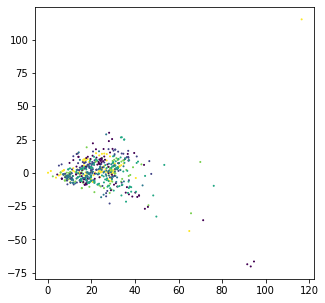

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0517


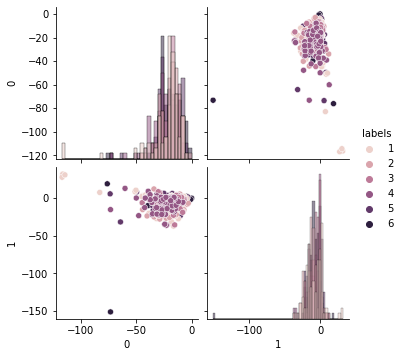

KPCA


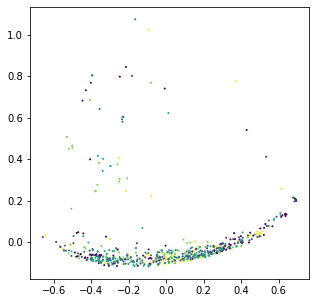

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0844


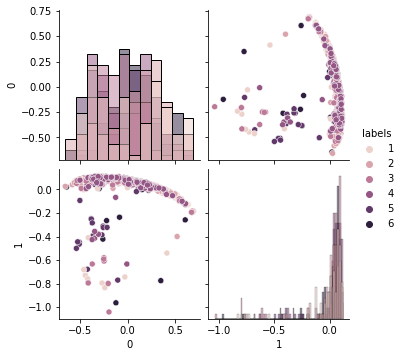

Spectral  NMI:0.0507
##################################
##################################
Representation wl2
##################################
(600, 600) (600, 25577)
n_clusters:  6
TSVD


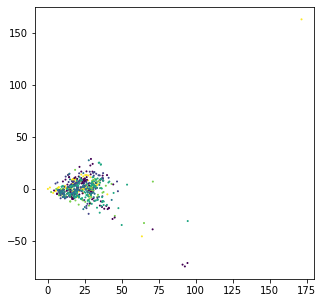

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0497


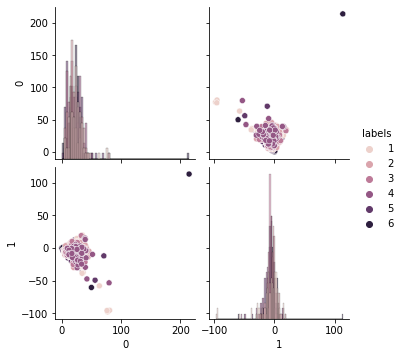

KPCA


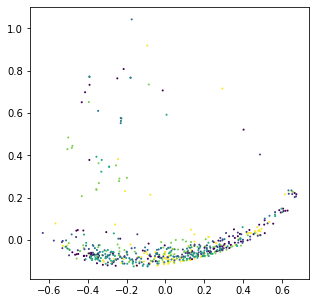

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0814


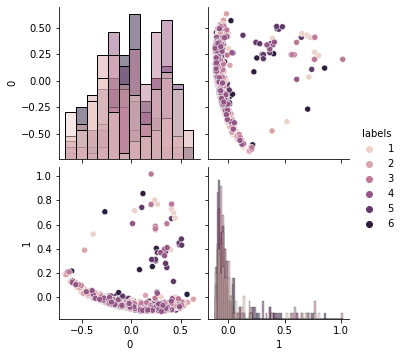

Spectral  NMI:0.0560
##################################
##################################
Representation wl3
##################################
(600, 600) (600, 42457)
n_clusters:  6
TSVD


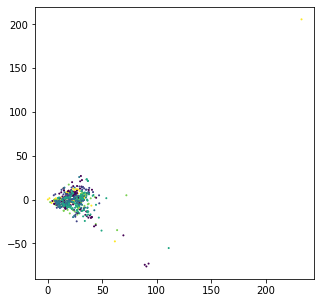

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0499


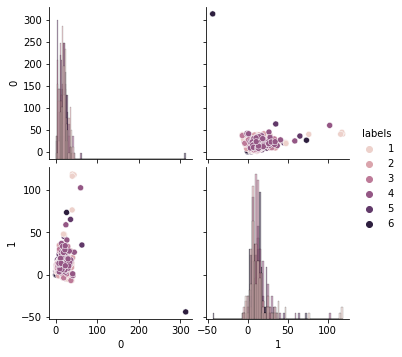

KPCA


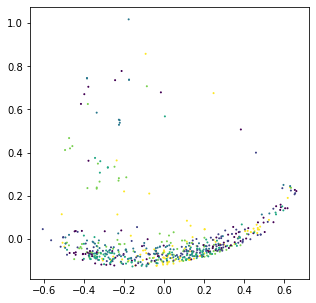

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0695


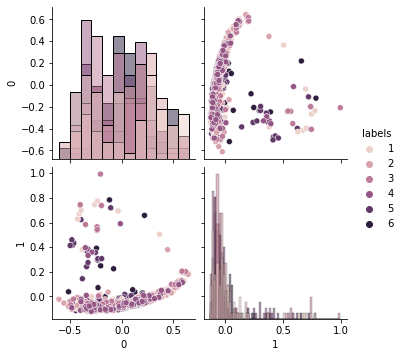

Spectral  NMI:0.0549
##################################
##################################
Representation wl4
##################################
(600, 600) (600, 59599)
n_clusters:  6
TSVD


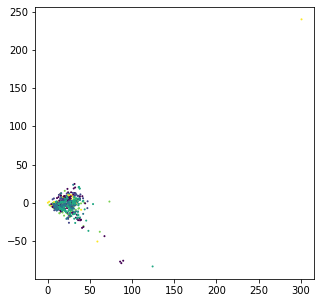

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0493


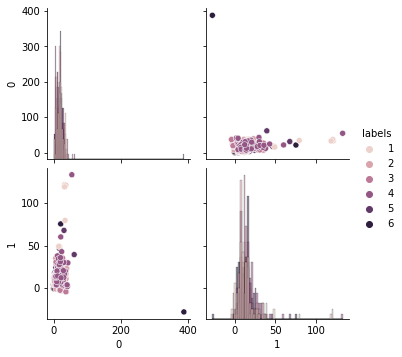

KPCA


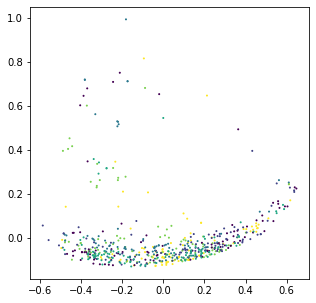

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0839


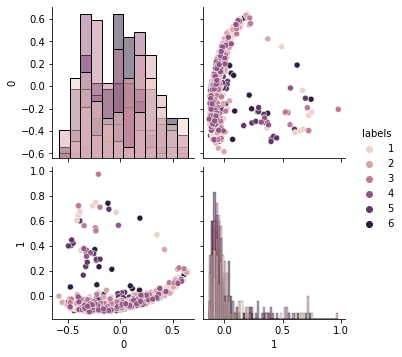

Spectral  NMI:0.0574
##################################
##################################
Representation wl5
##################################
(600, 600) (600, 76881)
n_clusters:  6
TSVD


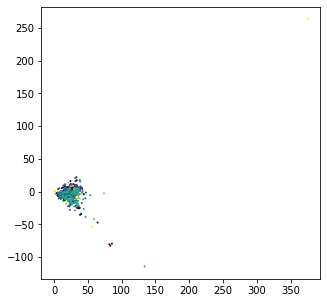

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0550


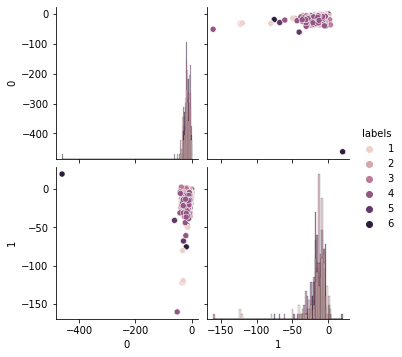

KPCA


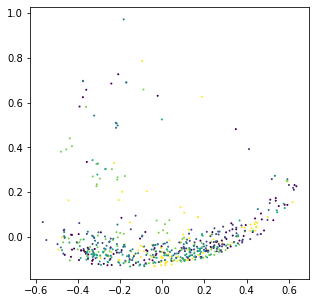

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0845


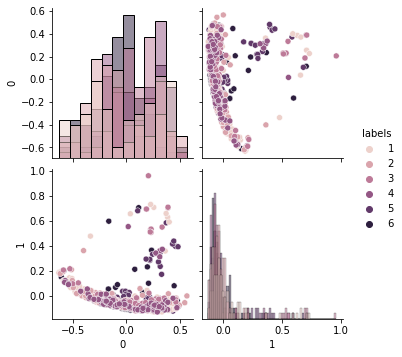

Spectral  NMI:0.0561
##################################
##################################
Representation graphlet
##################################
(600, 600) (600, 3455)
n_clusters:  6
TSVD


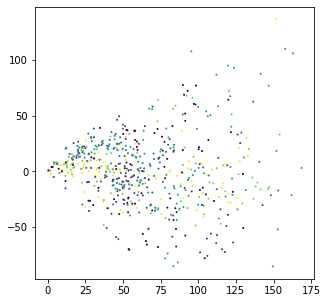

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0746


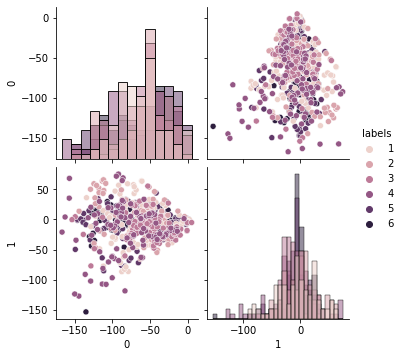

KPCA


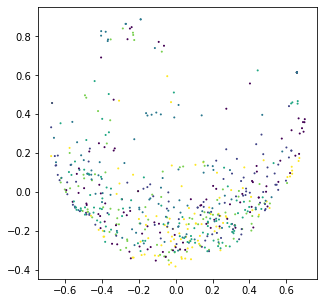

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0520


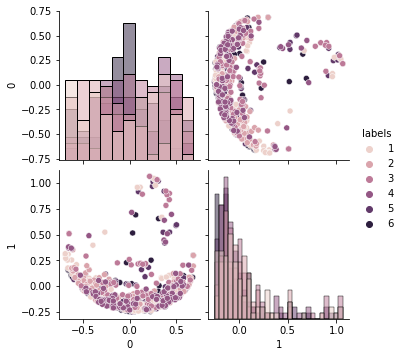

Spectral  NMI:0.0534
##################################
##################################
Representation shortestpath
##################################
(600, 600) (600, 25460)
n_clusters:  6
TSVD


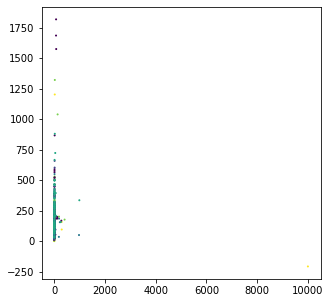

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0419


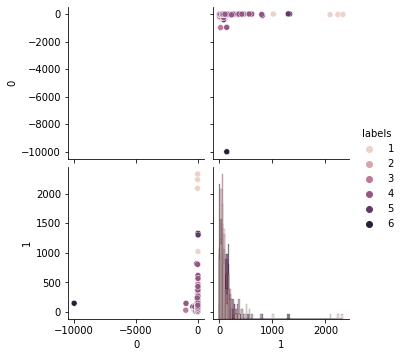

KPCA


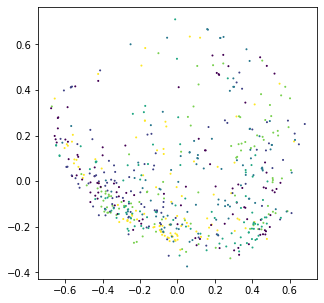

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0754


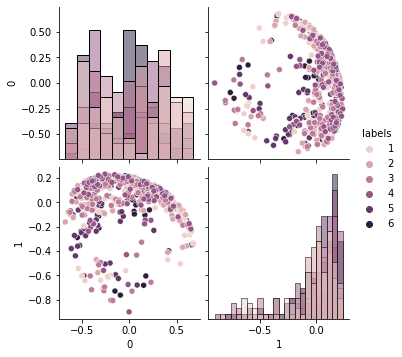

Spectral  NMI:0.0423
##################################


In [23]:
print("Dataset", dataset)

for representation in representations:
    print("##################################")
    print("Representation", representation)
    print("##################################")

    #Gram Matrix for the Weisfeiler-Lehman subtree kernel
    gram = load_csv(os.path.join(base_path,f"{dataset}_gram_matrix_{representation}.csv"))
    gram = aux.normalize_gram_matrix(gram)

    #Sparse Vectors for the Weisfeiler-Lehmann subtree kernel
    vec = load_sparse(os.path.join(base_path,f"{dataset}_vectors_{representation}.npz"))
    print(gram.shape, vec.shape)

    tsvd = TruncatedSVD(n_components=100)
    reduced_tsvd = tsvd.fit_transform(vec)

    kpca = KernelPCA(n_components=100, kernel="precomputed")
    reduced_kpca = kpca.fit_transform(gram)

    reduced_kpca_dict[f'{representation}'] = reduced_kpca
    reduced_tsvd_dict[f'{representation}'] = reduced_tsvd

    k = len(set(classes.tolist()))
    print("n_clusters: ", k)
    d = {0:"TSVD",1:"KPCA"}
    n_d = {0:nmis_tsvd, 1:nmis_kpca}
    for i,rep_i in enumerate([reduced_tsvd, reduced_kpca]):
        print(d[i])

        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(rep_i[:,0], rep_i[:,1], c=classes, s=1)
        plt.show();

        # Apply Subkmeans
        nrkm = NrKmeans(n_clusters=[k,1])#, allow_larger_noise_space=False)
        nrkm.fit(rep_i, best_of_n_rounds=10, verbose=False)
        print("Found Cluster Subspaces: ", nrkm.m)
        subkm_nmi = normalized_mutual_info_score(nrkm.labels[0],classes)
        print(f"Subkmeans NMI:{subkm_nmi:.4f}")    
        n_d[i][representation] = subkm_nmi
        # Plot rotated space
        V = nrkm.V
        rotated = np.dot(rep_i,V)
        reduced_df = pd.DataFrame(rotated[:,0:2])
        reduced_df["labels"] = classes#nrkm.labels[0]
        sns.pairplot(reduced_df, hue="labels", diag_kind="hist")
        plt.show();

    # Apply Spectral Clustering
    spec = SpectralClustering(n_clusters=k, affinity="precomputed")
    spec.fit(gram)
    spec_nmi = normalized_mutual_info_score(spec.labels_,classes)
    nmis_spec[representation] = spec_nmi
    print(f"Spectral  NMI:{spec_nmi:.4f}")   

    print("##################################")

In [24]:
res = {"KPCA":nmis_kpca,"TSVD": nmis_tsvd, "SPEC": nmis_spec}
for key, value in res.items():
    print(key)
    for (representation, nmi) in value.items():
        print(representation, ":", nmi)

KPCA
wl1 : 0.08439772602245711
wl2 : 0.08136124776134018
wl3 : 0.06950485637895969
wl4 : 0.0839362178039747
wl5 : 0.08454397607202319
graphlet : 0.05204015504518525
shortestpath : 0.07536826354684056
TSVD
wl1 : 0.05168435047360758
wl2 : 0.04967608289612381
wl3 : 0.04993102407389817
wl4 : 0.04925084593339739
wl5 : 0.054998317490421104
graphlet : 0.0745890794815146
shortestpath : 0.0419298647655842
SPEC
wl1 : 0.05065451295277612
wl2 : 0.05601517531635132
wl3 : 0.054883820946415134
wl4 : 0.05742317870293665
wl5 : 0.05609660023533893
graphlet : 0.05336100396006777
shortestpath : 0.042329350030624


As we can see, the best results were achieved by KPCA for Weisfeiler-Lehman representations (around 8%). That is why we decided to run our clustering algorithm on the data with dimensionality number reduced with KPCA.

## Visualizing and Interpreting the results

In [25]:
def visualize(G, color=None, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, 
                     pos=nx.spring_layout(G, seed=42),
                     with_labels=True,
                     node_color=color,
                     cmap="Set2")
    plt.show();

In [26]:
base_path = os.path.join("kernels", "without_labels")
ds_name = "ENZYMES"
classes = dp.get_dataset(ds_name)
G = tud_to_networkx(ds_name)
print(f"Number of graphs in data set is {len(G)}")
print(f"Number of classes {len(set(classes.tolist()))}")

Number of graphs in data set is 600
Number of classes 6


## Plot example enzyme

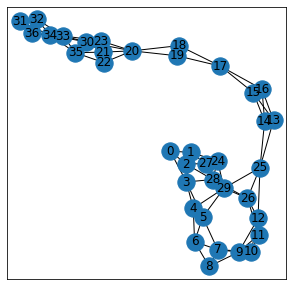

In [27]:
# We just use the first in the list
idx = 0
visualize(G[idx])

## Plot the vector representation with KernelPCA

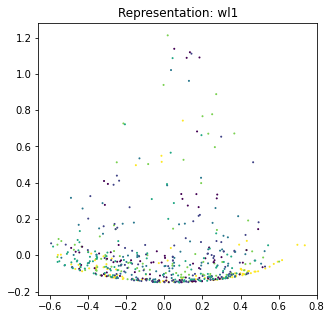

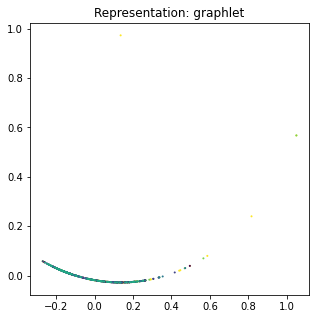

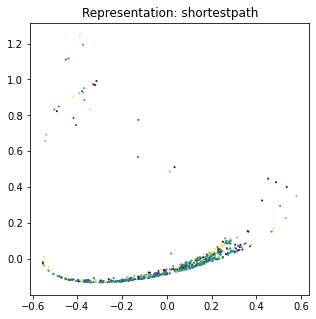

In [29]:
representations = ["wl1", "graphlet", "shortestpath"]

for representation in representations: 
    vec = load_sparse(os.path.join(base_path,f"{ds_name}_vectors_{representation}.npz"))
    gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_{representation}.csv"))
    gram = aux.normalize_gram_matrix(gram)

    kpca = KernelPCA(n_components=100, kernel="precomputed")
    reduced_kpca = kpca.fit_transform(gram)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(reduced_kpca[:,0], reduced_kpca[:,1], c=classes, s=1)
    ax.set_title("Representation: " + representation)
    plt.show();

## Plot the vector representation with TruncatedSVD 

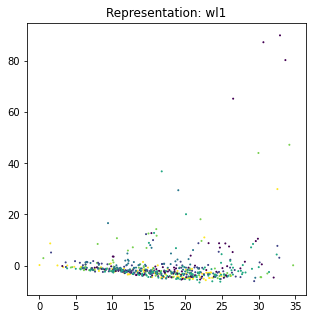

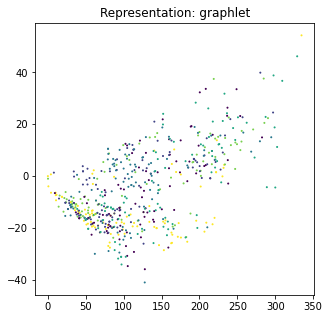

In [ ]:
for representation in representations: 
    vec = load_sparse(os.path.join(base_path,f"{ds_name}_vectors_{representation}.npz"))
    tsvd = TruncatedSVD(n_components=100)
    reduced_tsvd = tsvd.fit_transform(vec)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(reduced_tsvd[:,0], reduced_tsvd[:,1], c=classes, s=1)
    ax.set_title("Representation: " + representation)
    plt.show();

Unfortunaltley we were unable to perform a more detailed data analysis in a given timeframe as 2 of out teammates decided to leave the course before the deadline and our work estimations had to change as a result. We will add more details before the final deadline.

### P3C (Projected Clustering via Cluster Cores)

P3C has the following properties:
>- Effectively discovers the projected clusters in the data while being remarkable robust to the only parameter that it takes as input. The setting of this parameter requires little prior knowledge about the data and, in contrast to all previous approaches, there is no need to provide the number of projected clusters as input, since our algorithm can discover, under very general conditions, the true number of projected clusters.
>- Effectively discovers very low-dimensional projected clusters embedded in high-dimensional spaces.
>- Effectively discovers clusters with varying orientation in their relevant subspaces.
>- Scalable with respect to large data sets and high number of dimensions. 

The algorithm is comprised of the following steps:
>- Regions corresponding to projections of clusters onto single attributes are computed.
>- Cluster cores are identified by spatial areas that (1) are described by combination of the detected regions and (2) contain an unexpectedly large number of points.
>- Cluster cores are iteratively refined into projected clusters
>- Outliers are identified and the relevant attributes for each cluster are determined.

### Introduction

We chose the enyzmes dataset as one of our team members had prior experience with the field and it seemed interesting to the other participants as well. After that we proceeded with the algorithm selection and thought that P3C might suit our dataset due to the fact that it would be scalable with high number of dimensions and would be relatively easy to implement as it required tuning of only one parameter. In addition to that, the original paper stated that it is faster than some of the other algorithms we could choose (e.g. PROCLUS, ORCLUS)

In reality the latter the part about the parameters is not true as there are more parameters that influence the performance of the algorithm: computation for the number of bins, degrees of freedom for noise prediction.
In addition to that we had two team members leave the project one of which was the member with the knowledge of enzymes. This meant that further development was influenced by that and it made the evaluation of our results harder. 

### P3C implementation steps

The implementation has the following steps:
- Projections of true $p$-signatures
    - <u>Idea</u>: For each attribute compute the intervals that match or approximate well the projections of true $p$-signatures onto that attribute.
    - Identify attributes with uniform distribution and for the non-uniform attributes, to identify intervals with unusual high support using Chi-square goodness-of-fit test.
    - Each attribute is divided into same number of equi-sized bins. For every bin in every attribute, its support is computed.
    - On the attributes deemed non-uniform, the bin with the largest support is marked. The remaining un-marked bins are tested again using the Chi-square test for uniform distribution. If the Chi-square test indicates that the un-marked bins "look" uniform, then we stop. Otherwise, the bin with the second-largest support is marked. Repeat testing for remaining un-marked bins for the uniform distribution and marking bins in decreasing order of support, until the current set of un-marked bins satisifies the test. 
    - Compute intervals by merging adjacent marked bins. This marking process of bins is linear in the number of bins. 
- Finding the cluster cores
    - <u>Idea</u>: Determining which calculated $p$-signatures do in fact represent the projected clusters.
        - <u>Idea</u>: Compute the expected support of a given set when extending it by an additional attribute, while assuming uniform distribution.
        - Compare the expected support to the actual support of the candidate p-signature
        - Assumption: If the actual support greatly exceeds the expected one it is highly likely that the true projected cluster (true 𝑡-signature) expands over the newly added attribute
        - Validate according to the value of the Poission Probability density function how likely the observation was
    - Repeat until maximal sets are being found
    - Compute how many points are expected to belong to the support set to a specific support set in the case when they are not part of the true $t$-signature.
    - Compute the expected support of the signatures.
    - Check whether a support set belongs to the true $t$-signature by comparing the expected support to the actual support with the help of Poission probability density function. 
    - The results of that are considered to be the cluster cores.
- Computing the projected clusters
    - <u>Idea</u>: The support sets of the cluster cores found in the previous point may not necessarily contain all and only the points of the projected clusters that the cluster cores approximate, depending on the accuracy of the intervals computed in the first step. Refine found $k$ cluster cores into $k$ projected clusters. This is performed in a subscape of (reduced) dimensionality $d'$ of the original $d$-dimensional data, containing all attributes that were deemed non-uniform.
    - Describe the membership of data points to cluster cores through a fuzzy membership matrix $M=(m_{il})_{i=1,n,l,=1,k}$, where $m_{il}$ denotes the membership of object $i$ to cluster core $l$; it is defined as follows: $m_{il}=0$ if data point $i$ does not belong to the support set of any cluster core; $m_{il}$ is equal to the fraction of cluster cores that contain data point $i$ in their support set, if $i$ is in the support set of cluster core $l$. 
    - Compute the probability of a data point belonging to each projected cluster using Expectation Maximization algorithm which is initialized with the fuzzy membership matrix $M$. 
    - Assign points that have value 0 in the fuzzy membership matrix to one of the cluster cores with the shortest Mahalanobis distance to the cluster mean.
    - EM returns the matrix of probabilities that gives for each data point its probability of belonging to each projected cluster and assign each data point to the most probable cluster.
- Detect outliers
    - <u>Idea</u>: Find points that should not be a part of any cluster.
    - Use standard technique for multivariate outlier detection: The Mahalanobis distances between data points and the means of the projected clusters to which they belong are compared to the critical value of the Chi-square distribution with $d'$ degrees of freedom at a confidence level of $\alpha=0.001$.
    - Data points with Mahalanobis distances larger than this critical value are declared outliers. 
- Detect relevant attributes
    - <u>Idea</u>: Determine the relevant attributes of each projected cluster based on the cluster members.
    - The relevant attributes of a projected cluster include the attributes of the intervals that make up the $p$-signature of the cluster core based on which this cluster has been computed. 
    - Test each projected cluster using the Chi-square test whether its members are uniformly distributed in the attributes initially deemed uniform. 
    - Members of a projected cluster that are not uniformly distributed in one of the attributes initially considered uniform are considered to be relevant for the projected cluster.
    - The $p$-signatures of projected clusters are refined by computing the smallest interval that the cluster members project to for each relevant attribute. 


### Example visualization of the algorithm

#### First, we will generate a simple dataset with clear clusters to aid with visualisation

<img src="Report/sample_dataset1.png">
<img src="Report/sample_dataset2.png">

#### Then we split the data into bins along each axis.

##### Dimension 0
<img src="Report/bins0.png">

##### Dimension 1
<img src="Report/bins1.png">

##### Dimension 2
<img src="Report/bins2.png">

#### Put together

<img src="Report/bins.png">

#### We merge the bins

##### Dimension 0
<img src="Report/merged_bin0.png">

##### Dimension 1
<img src="Report/merged_bin1.png">

##### Dimension 2
<img src="Report/merged_bin2.png">

<img src="Report/merged_bins_lines.png">

<img src="Report/merged_bins3d.png">

#### Candidates

<img src="Report/candidates3d.png">

#### After outlier detection

<img src="Report/outliers.png">

<img src="Report/outliers3d.png">


#### Play around with the visualization in the file <code>AlgoVisualisation.ipynb</code>



### Our implementation results
After implementing the algorithm we evaluated it by comparing its clustering results with the results of the ELKI implementation. For the implementation comparison, we have used two datasets provided by ELKI: mouse and vary density. To verify different steps of the algorithm during the implementation, we have also generated a custom synthetic dataset consisting of multiple well-separated uniformly distributed clusters.

As we can see, PC3 does not work well for both mouse and vary density datasets in both our and ELKI’s implementations. The reason for this is that the algorithm heavily relies on the bins provided in the first step, and in both datasets, the points are not well separated in either of the dimensions, so PC3 finds only one big bin in each of the dimensions.

#### P3C ELKI result for mouse dataset

<img src="Report/ELKI_MOUSE_DS.PNG">

#### P3C our implementation result for mouse dataset
<img src="Report/ours_mouse_DS.PNG">

#### P3C ELKI result for vary dataset
<img src="Report/ELKI_vary_DS.PNG">

#### P3C our implementation result for vary dataset
<img src="Report/ours_vary_DS.PNG">

The algorithm works much better on the custom dataset, where the clusters are well separated in each of the dimensions, and subsequent cluster core search successfully identifies bins intersections in multiple dimensions. The ELKI implementation found 2 clusters and we found 3. It seems that ELKI implementation allows for each dimension to have only one correspondence in the another dimension, that's why when one bin in the x dimension corresponds to multiple bins in the other dimension, it merges two different bins into one cluster core. The paper does not state how this problem should be solved directly, so we assumed that one bin in one dimension can correspond to multiple bins in other dimensions, thus creating multiple candidates for the cluster cores. As we see, in this case out implementation provides a better result.

#### P3C ELKI result for synthetic dataset
<img src="Report/ELKI_synthetic_DS.PNG">

#### P3C our implementation result for synthetic dataset
<img src="Report/ours_synthetic_DS.PNG">

### Running our implementation on the enzymes dataset

Unfortunately the cluster core candidate generation step is very expensive, since we try to find intersections between all bins in all dimensions. Even with apriori-like approach, where higher dimension cluster core candidate generation is performed by merging valid intersections of smaller number of dimensions, the number of bins which should be compared is enormous. Thus running algorithm on the whole gram matrixes is not possible. To omit this problem, we have run our algorithm on the KPCA reduced number of dimensions. 

We have tried different number of dimensions and have decided for the 10 dimensions for PCA. The bigger number of dimensions did not provide any sensible results, probably because with additional dimensions the cluster cores were getting smaller and less representative. 

The graph shows clustering results on the 10-KPCA data. The red dots represent cluster centers before the final step when only cluster cores are considered, the green dots represent cluster centers after all points are assigned to some clusters and thus cluster centers are recomputed.

<img src="Report/ours_enzymes_10d.png">

#### Experimental results

Loading data:

In [2]:
from src import P3C

In [3]:
def load_csv(path):
    return np.loadtxt(path, delimiter=";")

def load_sparse(path):
    return load_npz(path)

def select_from_list(l, indices):
    return [l[i] for i in indices]

In [4]:
def visualize(G, color=None, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, 
                     pos=nx.spring_layout(G, seed=42),
                     with_labels=True,
                     node_color=color,
                     cmap="Set2")
    plt.show()

In [5]:
base_path = os.path.join("kernels", "node_labels")
ds_name = "ENZYMES"
classes = dp.get_dataset(ds_name)
G = tud_to_networkx(ds_name)
print(f"Number of graphs in data set is {len(G)}")
print(f"Number of classes {len(set(classes.tolist()))}")

Number of graphs in data set is 600
Number of classes 6


In [6]:
#Gram Matrix for the Weisfeiler-Lehman subtree kernel
iterations = 5
gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_wl{iterations}.csv"))
gram = aux.normalize_gram_matrix(gram)

Running the algorithm with 10 components using KernelPCA:

Constructing candidate tree: 
    Level:  0
    Level:  1
    Level:  2
    Level:  3
    Level:  4
    Level:  5
    Level:  6
    Level:  7
    Level:  8
    Level:  9
Constructing fuzzy matrix for 600 datapoints: 
    0/600
    100/600
    200/600
    300/600
    400/600
    500/600
Final cluster means:
{0: array([0.48792769, 0.12342789, 0.40293092, 0.37092852, 0.31170694,
       0.42981213, 0.30860552, 0.31119396, 0.50241938, 0.36600877]),
 1: array([0.23774334, 0.0546609 , 0.43122386, 0.40684138, 0.35728455,
       0.45511029, 0.40461116, 0.19826937, 0.46637641, 0.41202886]),
 2: array([0.50995514, 0.06004401, 0.27393166, 0.33122065, 0.25713898,
       0.45062474, 0.21735535, 0.38493237, 0.50491388, 0.65066243]),
 3: array([0.14043059, 0.1262018 , 0.45579423, 0.53397106, 0.86851116,
       0.0363387 , 0.25510985, 0.64895699, 0.47118417, 0.29646073]),
 4: array([0.14886752, 0.09817751, 0.49391311, 0.39740069, 0.58416314,
       0.23024989, 0.27707373, 0.41415887, 0.4311869 , 0.3481

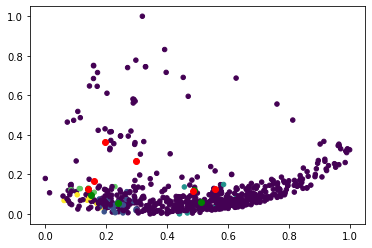

Chi critical value for outline detection:  8.64934362838297
    Found an outlier with the distance 9.015805987789278 at point (6, array([0.39214179, 0.83165303, 0.47626344, 0.44578188, 0.40021089,
       0.99529307, 0.76976207, 0.70903275, 0.51223882, 0.7714382 ]))


In [14]:
kpca = KernelPCA(n_components=10, kernel="precomputed")
data = kpca.fit_transform(gram)

data = P3C.normalize_data(data)
bins, nr_of_bins = P3C.split_into_bins(data)

for column_bins in bins:
    P3C.mark_bins(column_bins, nr_of_bins)

for column_bins in bins:
    P3C.mark_merge_bins(column_bins)

new_bins = P3C.merge_all_bins(bins)

poisson_threshold = 1e-4
tree = P3C.construct_candidate_tree_start(data, new_bins)
ns = P3C.construct_new_level(0, tree, poisson_threshold)
candidate_list = P3C.get_candidates(ns)
inv_cov_cluster_dict = P3C.get_inv_cov_cluster_dict(candidate_list)
result, gmm, means = P3C.get_result(data, candidate_list, inv_cov_cluster_dict)
means_after_bgm, cluster_dict, cluster_points = P3C.get_clusters_and_means(candidate_list, data, result, means)
P3C.plot_means(data, means, means_after_bgm, result)
clustered = P3C.find_outliers(data, candidate_list, cluster_dict, cluster_points, means_after_bgm, result)

Plotting the first 2 dimensions in clusters:

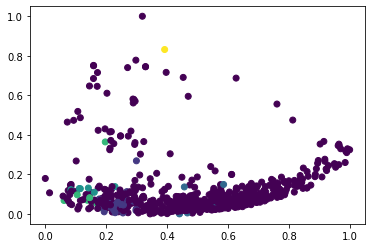

In [15]:
P3C.plot_clustered(clustered)

Calculating NMI:

In [16]:
p3c_nmi = normalized_mutual_info_score(result, classes)
print(f"P3C NMI:{p3c_nmi:.4f}")  

P3C NMI:0.0281


Graphs that are nearest to cluster means:

Last cluster represents the noise cluster.

In [17]:
from sklearn.metrics import pairwise_distances
# select first 2 nearest neighbours in for each cluster
nr_nearest = 2
nearest_indices = []
for cluster_i in set(result):
    mask = (result == cluster_i)
    selection = data[mask]
    print(f"number of data points in cluster {cluster_i}: {selection.shape[0]}")
    center_i = means_after_bgm[cluster_i].reshape(1,-1)
    distances_i = pairwise_distances(center_i, data)
    nearest_indices.append(np.argsort(distances_i, )[0][0:nr_nearest])
    print(f"Nearest data points in cluster {cluster_i}: {nearest_indices[-1]}")

number of data points in cluster 0: 557
Nearest data points in cluster 0: [390 435]
number of data points in cluster 1: 22
Nearest data points in cluster 1: [590  67]
number of data points in cluster 2: 7
Nearest data points in cluster 2: [435  78]
number of data points in cluster 3: 6
Nearest data points in cluster 3: [295 500]
number of data points in cluster 4: 8
Nearest data points in cluster 4: [592 142]


Cluster 0, Indices [390 435]


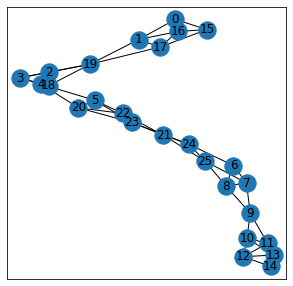

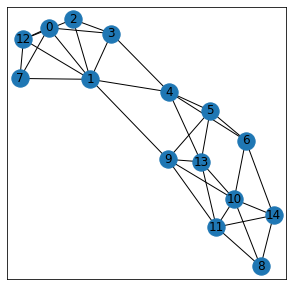

Cluster 1, Indices [590  67]


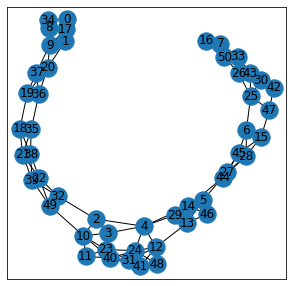

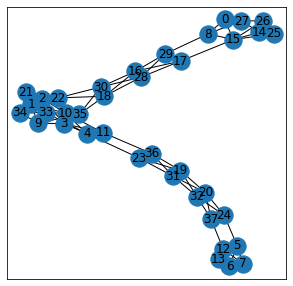

Cluster 2, Indices [435  78]


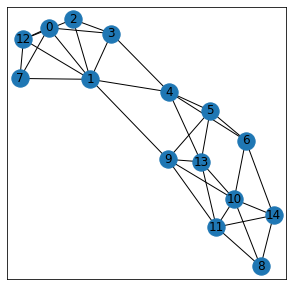

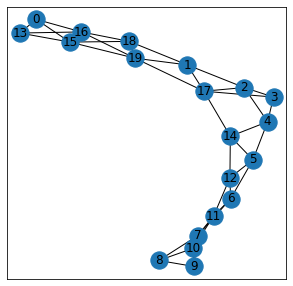

Cluster 3, Indices [295 500]


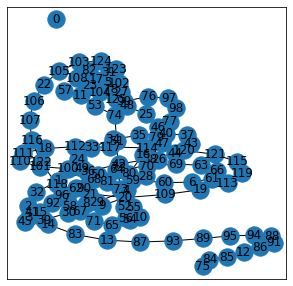

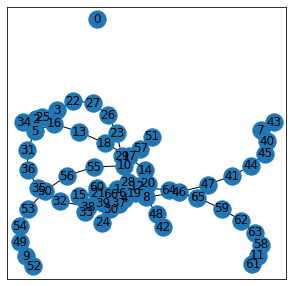

Cluster 4, Indices [592 142]


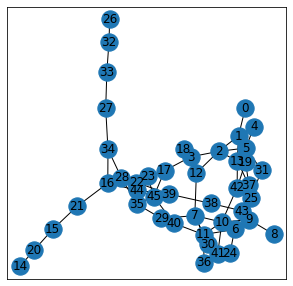

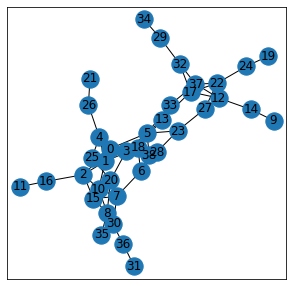

In [18]:
for i, indices in enumerate(nearest_indices):
    print(f"Cluster {i}, Indices {indices}")
    G_selected = select_from_list(G, indices)
    for g_i in G_selected:
        visualize(g_i)

Even though our algorithm results aren't very representative of the ground truth labels, the graphs nearest to the cluster medians still show a high degree of similarity, showing that our clusters do represent a clustering.  